<ipython-input-2-8d6137f6b222>:14: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['booking_date'] = pd.to_datetime(df['booking_date'], dayfirst=True, errors='coerce')
<ipython-input-2-8d6137f6b222>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['booking_status'] = df['booking_status'].str.strip().str.lower()
<ipython-input-2-8d6137f6b222>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bookin

Rows with invalid dates:
               booking_id  property_id booking_date check_in_date  \
8981     May072216558RT17        16558   2022-05-05    2022-07-05   
8999     May072216558RT28        16558   2022-05-03    2022-07-05   
9023     May072216559RT14        16559   2022-04-17    2022-07-05   
9024     May072216559RT15        16559   2022-05-02    2022-07-05   
9039    May072216559RT120        16559   2022-04-16    2022-07-05   
...                   ...          ...          ...           ...   
134585   Jul312217564RT46        17564   2022-07-29           NaT   
134586   Jul312217564RT47        17564   2022-07-30           NaT   
134587   Jul312217564RT48        17564   2022-07-30           NaT   
134588   Jul312217564RT49        17564   2022-07-29           NaT   
134589  Jul312217564RT410        17564   2022-07-31           NaT   

       checkout_date  no_guests room_category booking_platform  ratings_given  \
8981             NaT          2           RT1          journey   

<ipython-input-2-8d6137f6b222>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_platform.index, y=revenue_by_platform.values, palette='viridis')


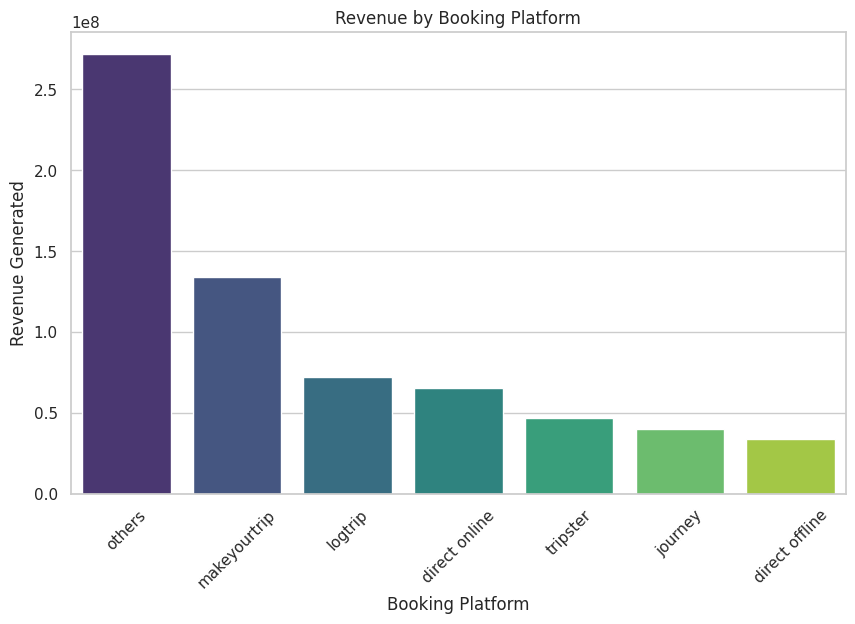

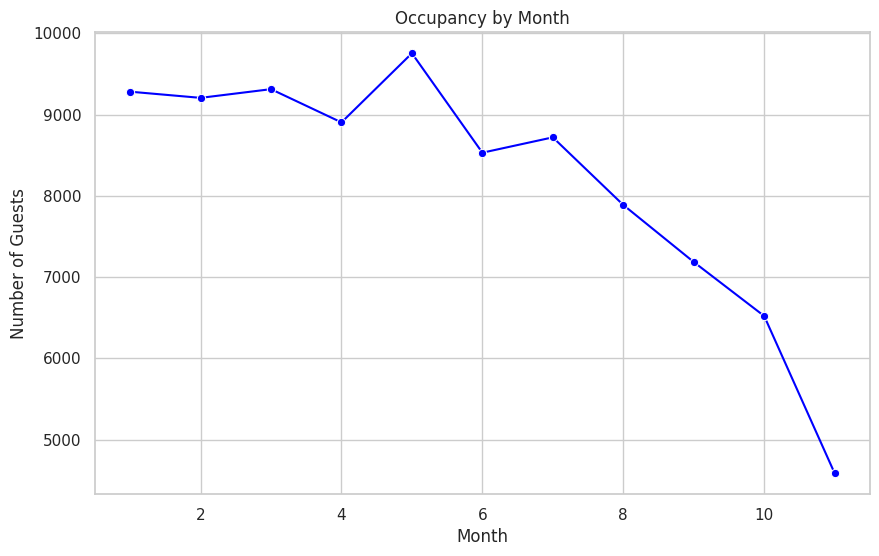


Booking Status Split:
booking_status
checked out    31149
cancelled      11169
no show         2197
Name: count, dtype: int64


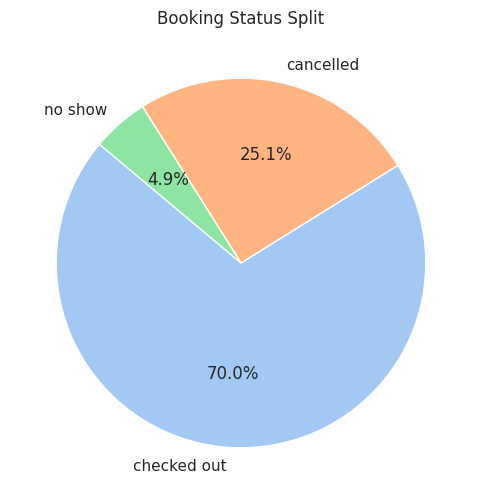

Cleaned data saved to cleaned_dataset.csv


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
# Update the file path as needed
file_path = "/content/fact_bookings.csv"
df = pd.read_csv(file_path)

# Data Cleaning and Preprocessing
# Convert date columns to datetime format with error handling
df['booking_date'] = pd.to_datetime(df['booking_date'], dayfirst=True, errors='coerce')
df['check_in_date'] = pd.to_datetime(df['check_in_date'], dayfirst=True, errors='coerce')
df['checkout_date'] = pd.to_datetime(df['checkout_date'], dayfirst=True, errors='coerce')

# Fill missing ratings with 0 and convert to integer
df['ratings_given'] = df['ratings_given'].fillna(0).astype(int)

# Handle rows with invalid dates (NaT)
print("Rows with invalid dates:")
print(df[df['check_in_date'].isna() | df['checkout_date'].isna()])

# Optionally, drop rows with invalid dates
df = df.dropna(subset=['check_in_date', 'checkout_date'])

# Convert categorical columns to consistent format
df['booking_status'] = df['booking_status'].str.strip().str.lower()
df['booking_platform'] = df['booking_platform'].str.strip().str.lower()
df['room_category'] = df['room_category'].str.strip().str.upper()

# Derived Metrics
df['stay_duration'] = (df['checkout_date'] - df['check_in_date']).dt.days
df['revenue_per_guest'] = df['revenue_generated'] / df['no_guests']

# Data Exploration and Visualization
# Revenue Summary
print("Total Revenue Generated:", df['revenue_generated'].sum())
print("Total Revenue Realized:", df['revenue_realized'].sum())

# Revenue by Booking Platform
revenue_by_platform = df.groupby('booking_platform')['revenue_generated'].sum().sort_values(ascending=False)
print("\nRevenue by Booking Platform:")
print(revenue_by_platform)

# Occupancy Rate Calculation
total_days = df['stay_duration'].sum()
total_guests = df['no_guests'].sum()
occupancy_rate = (total_guests / total_days) if total_days > 0 else 0
print("\nOccupancy Rate (%):", occupancy_rate * 100)

# Average Rating by Booking Platform
avg_rating_by_platform = df.groupby('booking_platform')['ratings_given'].mean()
print("\nAverage Ratings by Booking Platform:")
print(avg_rating_by_platform)

# Plot Revenue by Booking Platform
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_platform.index, y=revenue_by_platform.values, palette='viridis')
plt.title('Revenue by Booking Platform')
plt.xlabel('Booking Platform')
plt.ylabel('Revenue Generated')
plt.xticks(rotation=45)
plt.show()

# Plot Occupancy Rate Trends
df['check_in_month'] = df['check_in_date'].dt.month
occupancy_by_month = df.groupby('check_in_month')['no_guests'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=occupancy_by_month.index, y=occupancy_by_month.values, marker='o', color='blue')
plt.title('Occupancy by Month')
plt.xlabel('Month')
plt.ylabel('Number of Guests')
plt.grid(True)
plt.show()

# Split by Booking Status
booking_status_split = df['booking_status'].value_counts()
print("\nBooking Status Split:")
print(booking_status_split)

plt.figure(figsize=(8, 6))
booking_status_split.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Booking Status Split')
plt.ylabel('')
plt.show()

# Save cleaned data for further analysis
cleaned_file_path = "cleaned_dataset.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to {cleaned_file_path}")
